In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from src.load_data import load_all_data
from src.clean_data import clean_contacts, clean_users, clean_listings
from src.metrics import (
    booking_rate, response_rate, acceptance_rate,
    avg_response_time, avg_accept_time,
    conversion_by_contact_channel, conversion_by_user_stage
)
from src.funnel_analysis import (
    get_funnel_stage_distribution, funnel_by_contact_channel,
    funnel_by_guest_user_stage, funnel_by_room_type, funnel_by_neighborhood
)
from src.recommendations import generate_recommendations
# contacts_df, listings_df, users_df = load_all_data()
# datetime_cols = [
#         'ts_booking_at',
#         'ts_reply_at_first',
#         'ts_interaction_first',
#         'ts_accepted_at_first',
#     ]
# for col in datetime_cols:
#     contacts_df[col] = pd.to_datetime(contacts_df[col], errors='coerce')
# mask_invalid = (
#         (contacts_df['ts_reply_at_first'].apply(type) != pd.Timestamp)
#         | (contacts_df['ts_interaction_first'].apply(type) != pd.Timestamp)
#     )
# print(contacts_df.loc[mask_invalid, ['ts_reply_at_first', 'ts_interaction_first']])



In [4]:
# Load raw data
contacts_df, listings_df, users_df = load_all_data()

# Clean
contacts_df = clean_contacts(contacts_df)
listings_df = clean_listings(listings_df)
users_df = clean_users(users_df)


c:\Users\vaish\OneDrive\Desktop\Semester4\DataProjects\airbnb-rio-booking-analysis-\src\clean_data.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_reviews'] = df['total_reviews'].fillna(0).astype(int)


In [5]:
print("Booking Rate:", booking_rate(contacts_df))
print("Response Rate:", response_rate(contacts_df))
print("Acceptance Rate:", acceptance_rate(contacts_df))
print("Avg Response Time (hrs):", avg_response_time(contacts_df))
print("Avg Acceptance Time (hrs):", avg_accept_time(contacts_df))

conversion_channel = conversion_by_contact_channel(contacts_df)
print(conversion_channel)

conversion_user_type = conversion_by_user_stage(contacts_df)
print(conversion_user_type)


Booking Rate: 0.4154982608383835
Response Rate: 0.9271345071180119
Acceptance Rate: 0.5886255244379102
Avg Response Time (hrs): 19.436510889607842
Avg Acceptance Time (hrs): 20.832697804521164
contact_channel_first
instant_book    1.000000
book_it         0.476094
contact_me      0.071017
Name: booking_happened, dtype: float64
guest_user_stage_first
past_booker    0.526325
-unknown-      0.400000
new            0.332285
Name: booking_happened, dtype: float64


In [6]:
# Funnel stages
funnel_dist = get_funnel_stage_distribution(contacts_df)
print(funnel_dist)

# By channel
print(funnel_by_contact_channel(contacts_df))

# By user type
print(funnel_by_guest_user_stage(contacts_df))

# By room type
room_type_conv = funnel_by_room_type(contacts_df, listings_df)
print(room_type_conv)

# By neighborhood
neighborhood_perf = funnel_by_neighborhood(contacts_df, listings_df)
neighborhood_perf.head()


funnel_stage
booked      0.415498
replied     0.338509
accepted    0.173127
no_reply    0.072865
Name: proportion, dtype: float64
funnel_stage           accepted    booked  no_reply   replied
contact_channel_first                                        
book_it                 0.03072  0.476094  0.103156  0.390031
contact_me              0.35633  0.071017  0.091129  0.481525
instant_book            0.00000  1.000000  0.000000  0.000000
guest_user_stage_first
past_booker    0.526325
-unknown-      0.400000
new            0.332285
Name: booking_happened, dtype: float64
room_type
private room    0.471175
shared room     0.326014
Name: booking_happened, dtype: float64


,mean,count
listing_neighborhood,,
Lagoa,0.727273,55
Santa Teresa,0.640777,309
Leme,0.619469,113
Centro,0.573770,61
Ipanema,0.572482,407


In [7]:
metrics_summary = {
    "booking_rate": booking_rate(contacts_df),
    "avg_response_time": avg_response_time(contacts_df),
}

recommendations = generate_recommendations(
    metrics=metrics_summary,
    funnel_by_channel=conversion_channel,
    room_type_conversion=room_type_conv,
    user_stage_conversion=conversion_user_type
)

for rec in recommendations:
    print("Insight:", rec['insight'])
    print("Recommendation:", rec['recommendation'])
    print("---")


Insight: Instant Book has a conversion rate of 100.00%, significantly higher than the average 41.55%.
Recommendation: Encourage more hosts to opt in to Instant Book. Consider incentives or feature promotions.
---
Insight: Private Rooms have the highest booking rate at 47.12%. Shared Rooms convert at only 32.60%.
Recommendation: Surface more private rooms in search results, or improve the visibility of better-converting room types.
---
Insight: Average host response time is 19.4 hours, which may be too slow for real-time booking expectations.
Recommendation: Improve host responsiveness — consider SMS nudges, response SLAs, or reward fast responders.
---


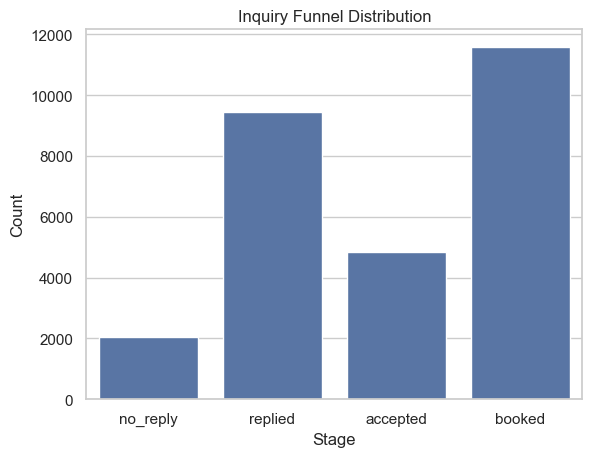

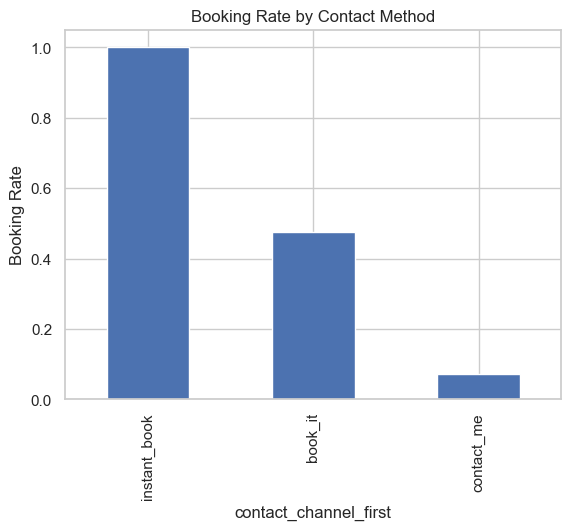

In [8]:
# Funnel stage distribution bar chart
sns.countplot(data=contacts_df, x='funnel_stage', order=['no_reply', 'replied', 'accepted', 'booked'])
plt.title('Inquiry Funnel Distribution')
plt.xlabel('Stage')
plt.ylabel('Count')
plt.show()

# Booking rate by contact method
conversion_channel.plot(kind='bar', title='Booking Rate by Contact Method', ylabel='Booking Rate')
plt.show()


c:\Users\vaish\OneDrive\Desktop\Semester4\DataProjects\airbnb-rio-booking-analysis-\outputs\plots.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='funnel_stage', order=order, palette="Blues_d")


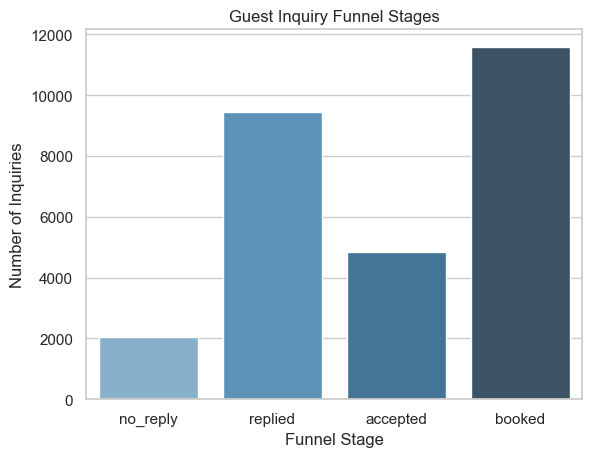

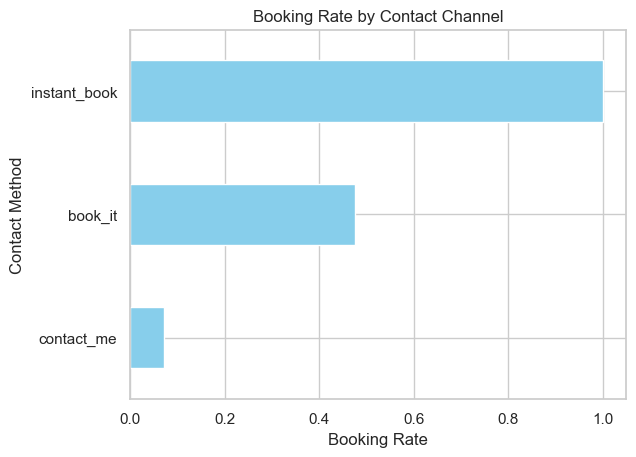

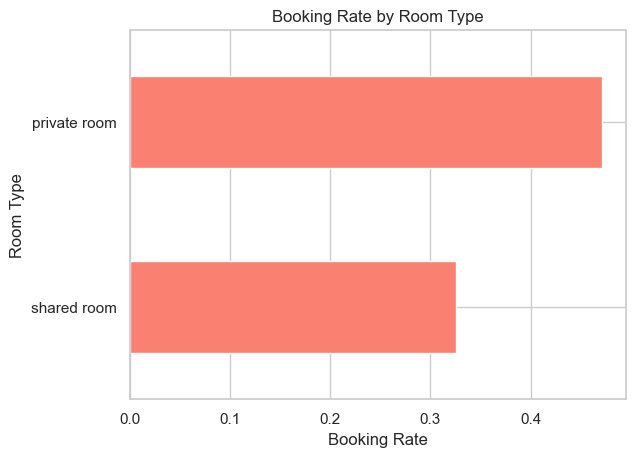

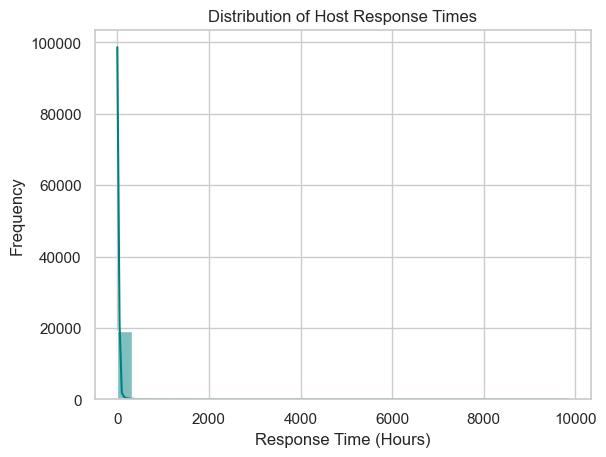

In [9]:
from outputs.plots import (
    plot_funnel_stage_distribution,
    plot_booking_rate_by_contact_channel,
    plot_booking_rate_by_room_type,
    plot_response_time_distribution
)

plot_funnel_stage_distribution(contacts_df)
plot_booking_rate_by_contact_channel(contacts_df)
plot_booking_rate_by_room_type(contacts_df, listings_df)
plot_response_time_distribution(contacts_df)
